# 📊 Enhanced Data Analysis & Visualization Project (Python, Pandas, Matplotlib)

### 📝Notebook Outline:
##### Introduction & Dataset Loading
##### Data Cleaning & Preprocessing
##### Exploratory Data Analysis (EDA)
##### Visualizations:
##### Global Trend Over Time
##### Top 10 Countries Bar Plot
##### Correlation Heatmap
##### Further Enhancements:
##### Moving Averages
##### Comparing Daily New Cases Between Countries
##### Export Cleaned Data & Plots
##### Easily Replace Dataset(stock, weather, etc)


#### 📥 1️⃣ Import Libraries & Load Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For date formatting
from datetime import datetime

# Load dataset
df = pd.read_csv("https://raw.githubusercontent.com/datasets/covid-19/main/data/countries-aggregated.csv")

# Preview
df.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-23,Afghanistan,0,0,0
2,2020-01-24,Afghanistan,0,0,0
3,2020-01-25,Afghanistan,0,0,0
4,2020-01-26,Afghanistan,0,0,0


#### 🧹 2️⃣ Data Cleaning & Preprocessing

In [2]:
# Check missing values
print(df.isnull().sum())

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Verify data types
print(df.dtypes)

Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64
Date         datetime64[ns]
Country              object
Confirmed             int64
Recovered             int64
Deaths                int64
dtype: object


#### 🔍 3️⃣ Exploratory Data Analysis (EDA)

In [3]:
# Total confirmed cases by country
total_cases = df.groupby('Country')['Confirmed'].max().sort_values(ascending=False)
print("Top 10 Countries by Total Cases:\n", total_cases.head(10))

# Summary statistics
df.describe()

Top 10 Countries by Total Cases:
 Country
US                80625120
India             43042097
Brazil            30250077
France            27874269
Germany           23416663
United Kingdom    21916961
Russia            17801103
Korea, South      16305752
Italy             15659835
Turkey            14991669
Name: Confirmed, dtype: int64


,Date,Confirmed,Recovered,Deaths
count,161568,1.615680e+05,1.615680e+05,161568.000000
mean,2021-03-04 11:59:59.999999232,7.361569e+05,1.453967e+05,13999.436089
min,2020-01-22 00:00:00,0.000000e+00,0.000000e+00,0.000000
25%,2020-08-12 18:00:00,1.220000e+03,0.000000e+00,17.000000
50%,2021-03-04 12:00:00,2.369200e+04,1.260000e+02,365.000000
75%,2021-09-24 06:00:00,2.558420e+05,1.797225e+04,4509.000000
max,2022-04-16 00:00:00,8.062512e+07,3.097475e+07,988609.000000
std,NaN,3.578884e+06,9.748275e+05,59113.581271


### 📈 4️⃣ Visualizations
#### 🌍 Global Trend Over Time:

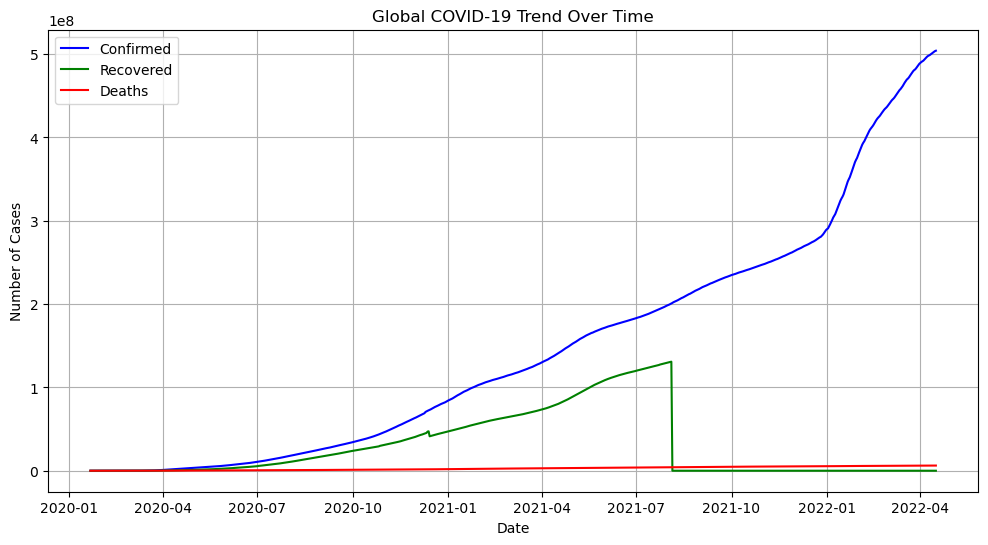

In [4]:
global_data = df.groupby('Date')[['Confirmed', 'Recovered', 'Deaths']].sum().reset_index()

plt.figure(figsize=(12,6))
plt.plot(global_data['Date'], global_data['Confirmed'], label='Confirmed', color='blue')
plt.plot(global_data['Date'], global_data['Recovered'], label='Recovered', color='green')
plt.plot(global_data['Date'], global_data['Deaths'], label='Deaths', color='red')
plt.title('Global COVID-19 Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.grid(True)
plt.show()

#### 🌎 Top 10 Countries by Confirmed Cases:

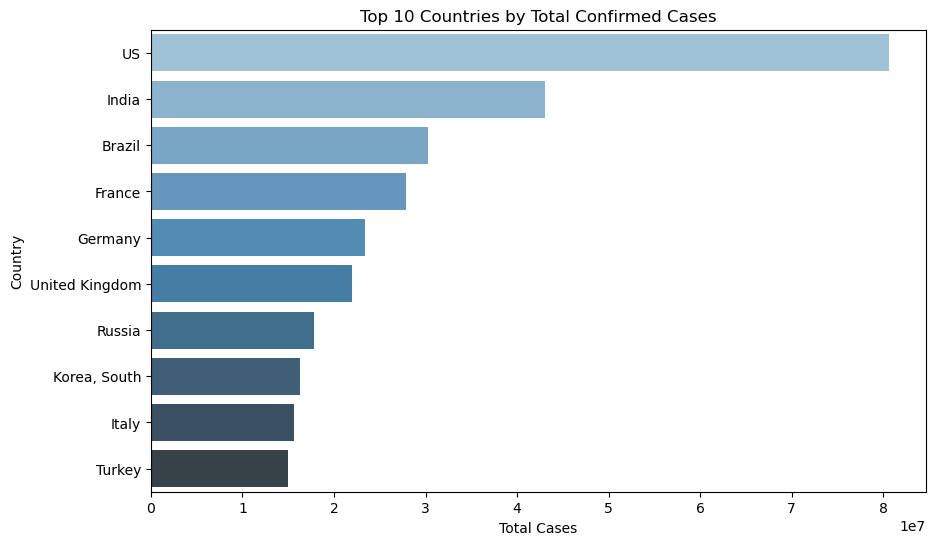

In [5]:
top10 = total_cases.head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top10.values, y=top10.index, palette='Blues_d')
plt.title('Top 10 Countries by Total Confirmed Cases')
plt.xlabel('Total Cases')
plt.ylabel('Country')
plt.show()

#### 🔥 Correlation Heatmap:

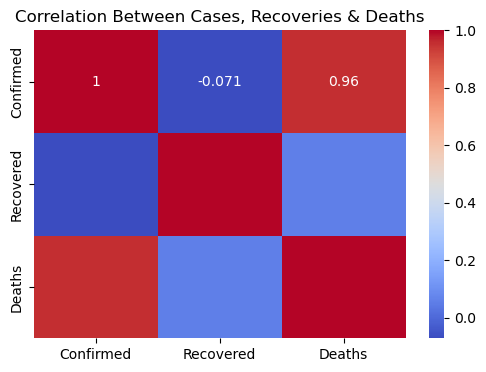

In [6]:
corr = global_data[['Confirmed', 'Recovered', 'Deaths']].corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Between Cases, Recoveries & Deaths')
plt.show()

### 🚀 5️⃣ Further Enhancements
#### 📊 (a) Moving Average for Smoother Trends

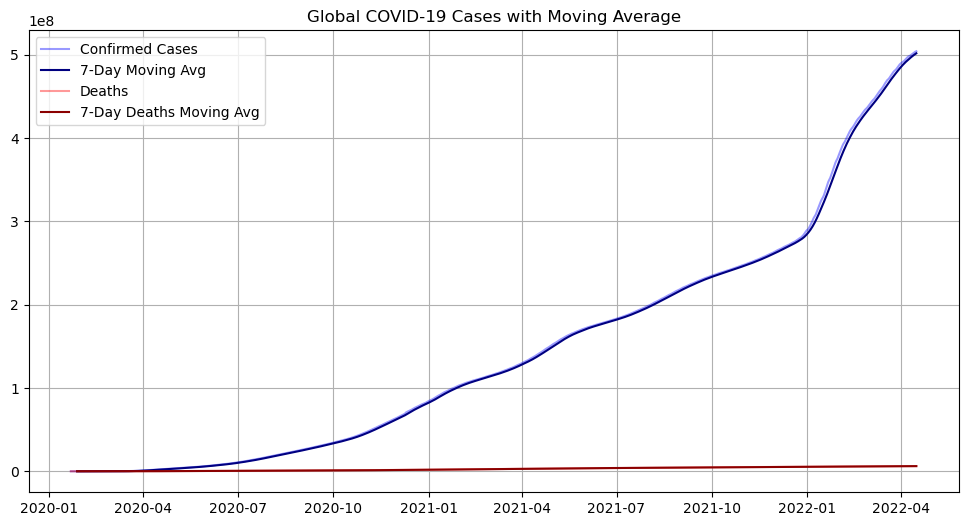

In [7]:
global_data['Confirmed_MA'] = global_data['Confirmed'].rolling(window=7).mean()
global_data['Deaths_MA'] = global_data['Deaths'].rolling(window=7).mean()

plt.figure(figsize=(12,6))
plt.plot(global_data['Date'], global_data['Confirmed'], alpha=0.4, label='Confirmed Cases', color='blue')
plt.plot(global_data['Date'], global_data['Confirmed_MA'], label='7-Day Moving Avg', color='navy')
plt.plot(global_data['Date'], global_data['Deaths'], alpha=0.4, label='Deaths', color='red')
plt.plot(global_data['Date'], global_data['Deaths_MA'], label='7-Day Deaths Moving Avg', color='darkred')
plt.title('Global COVID-19 Cases with Moving Average')
plt.legend()
plt.grid(True)
plt.show()

#### 🌐 (b) Compare Daily New Cases Between Selected Countries

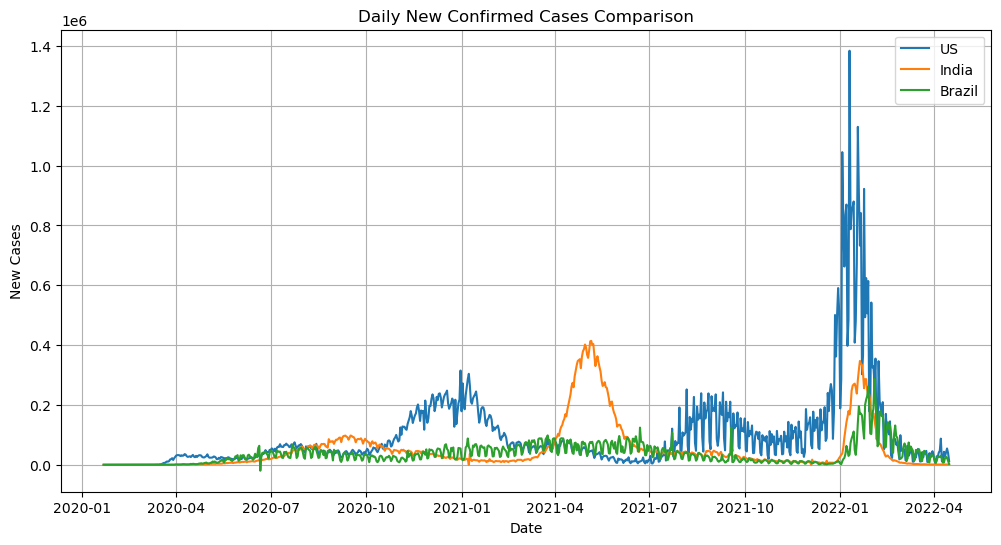

In [8]:
selected_countries = ['US', 'India', 'Brazil']

plt.figure(figsize=(12,6))
for country in selected_countries:
    country_data = df[df['Country'] == country].groupby('Date')['Confirmed'].sum().diff().fillna(0)
    plt.plot(df[df['Country'] == country]['Date'].unique(), country_data, label=country)

plt.title('Daily New Confirmed Cases Comparison')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.legend()
plt.grid(True)
plt.show()

#### 📥 (c) Export Cleaned Data & Visualizations

Data & plots exported successfully!


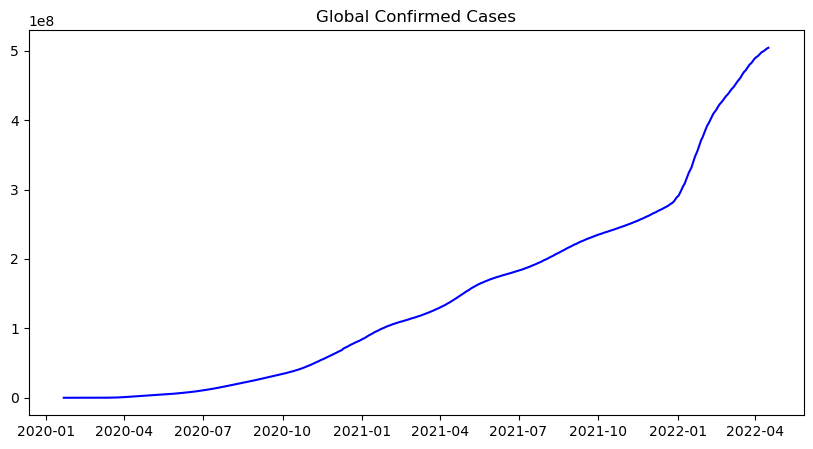

In [9]:
# Export cleaned dataset
df.to_csv('cleaned_covid_data.csv', index=False)

# Save plot as image
plt.figure(figsize=(10,5))
plt.plot(global_data['Date'], global_data['Confirmed'], color='blue')
plt.title('Global Confirmed Cases')
plt.savefig('global_cases_plot.png')

print("Data & plots exported successfully!")

#### 🔄 (d) Replace Dataset Easily: (For Stocks, Weather, etc.)

##### To adapt this notebook:
##### 1. Replace the `df = pd.read_csv('your_dataset.csv')` line.
##### 2. Adjust columns like 'Confirmed', 'Recovered', 'Deaths' to match your dataset (e.g., 'Close Price', 'Temperature').
##### 3. Visualizations & EDA logic will stay almost identical!